In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [2]:
"""Dataset Info"""

"""
Name of dataset: 2023-2024 NBA Player Stats - Regular

Dataset link: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats/data

Dataset download: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats?resource=download&select=2023-2024+NBA+Player+Stats+-+Regular.csv

License: Attribution 4.0 International(CC BY 4.0 DEED). Canonical URL  https://creativecommons.org/licenses/by/4.0/

Size: 2023-2024 NBA Player Stats - Regular.csv is 93.1 KB

"""

'\nName of dataset: 2023-2024 NBA Player Stats - Regular\n\nDataset link: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats/data\n\nDataset download: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats?resource=download&select=2023-2024+NBA+Player+Stats+-+Regular.csv\n\nLicense: Attribution 4.0 International(CC BY 4.0 DEED). Canonical URL  https://creativecommons.org/licenses/by/4.0/\n\nSize: 2023-2024 NBA Player Stats - Regular.csv is 93.1 KB\n\n'

In [3]:
"""
Characteristics of this dataset:

This data set contains various data on all NBA players in the 2023-2024 NBA regular season. The player data it contains includes Player's name, Position, Player's age, Player's
  Team, Games played, Games started, Minutes played per game, various shooting data, shooting efficiency, rebound data, steal data and block data, etc. This is everything in the header of the data table and what it means:

Rk: Rank
Player : Player's name
Pos: Position
Age: Player's age
Tm:Team
G : Games played
GS: Games started
MP: Minutes played per game
FG: Field goals per game
FGA: Field goal attempts per game
FG%: Field goal percentage
3P: 3-point field goals per game
3PA: 3-point field goal attempts per game
3P%: 3-point field goal percentage
2P: 2-point field goals per game
2PA: 2-point field goal attempts per game
2P%: 2-point field goal percentage
eFG% : Effective field goal percentage
FT: Free throws per game
FTA: Free throw attempts per game
FT%: Free throw percentage
ORB: Offensive rebounds per game
DRB: Defensive rebounds per game
TRB : Total rebounds per game
AST: Assists per game
STL: Steals per game
BLK : Blocks per game
TOV: Turnovers per game
PF : Personal fouls per game
PTS: Points per game

The data set records a total of 735 pieces of data. It should be noted that some players will change teams during the season. Therefore, a player will have multiple pieces of data on different teams at the same time.
"""

"\nCharacteristics of this dataset:\n\nThis ROR data includes most of the well-known funders in the world, which can be used for Education, Govenment, Facility, etc.\nIt contains the funder's information, such as name, links, wikipedia url, country, and so on.\nOverall, there are 105294 rows for this data.\nSome of the data is string, some of them are numbers, some of them are urls.\n"

In [4]:
# Try loading the data with a different encoding, commonly 'ISO-8859-1' for CSV files with non-standard characters
data_iso = pd.read_csv("data/2023-2024 NBA Player Stats - Regular.csv", delimiter=";", encoding='ISO-8859-1')

# Display the first few rows of the dataframe
data_iso.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


Describes the average three-point field goal percentage of all players on each team

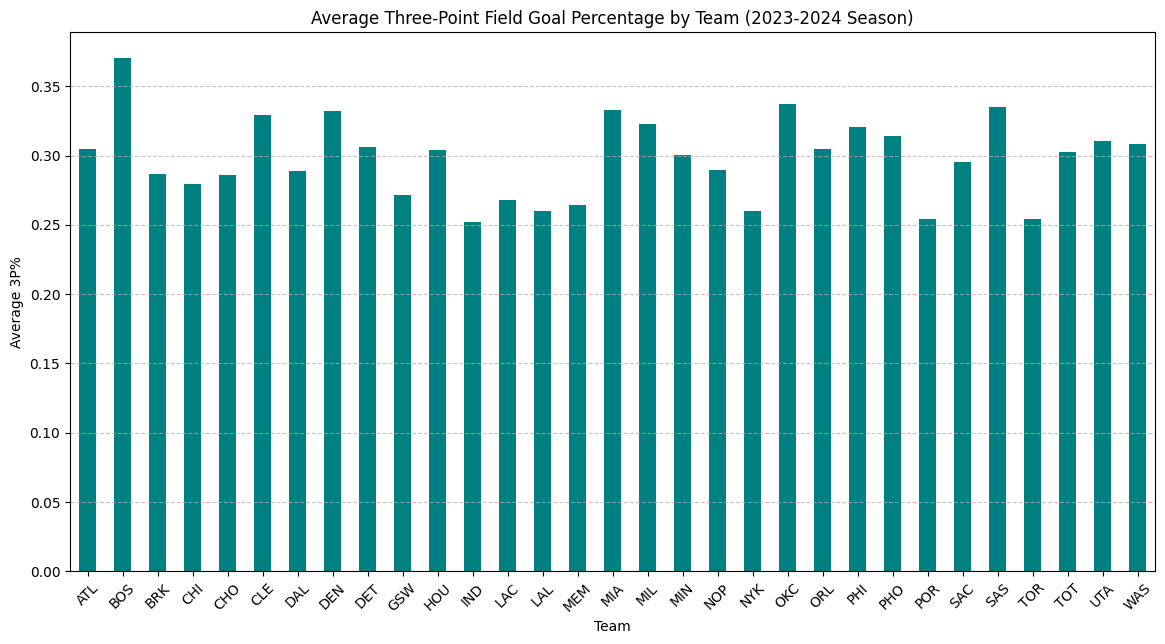

In [5]:
# Calculate the average three-point field goal percentage (3P%) for each team
team_avg_3p = data_iso.groupby('Tm')['3P%'].mean()

# Create a bar chart for visualization
plt.figure(figsize=(14, 7))
team_avg_3p.plot(kind='bar', color='teal')
plt.title('Average Three-Point Field Goal Percentage by Team (2023-2024 Season)')
plt.xlabel('Team')
plt.ylabel('Average 3P%')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Describe the average two-point field goal percentage of all players on each team

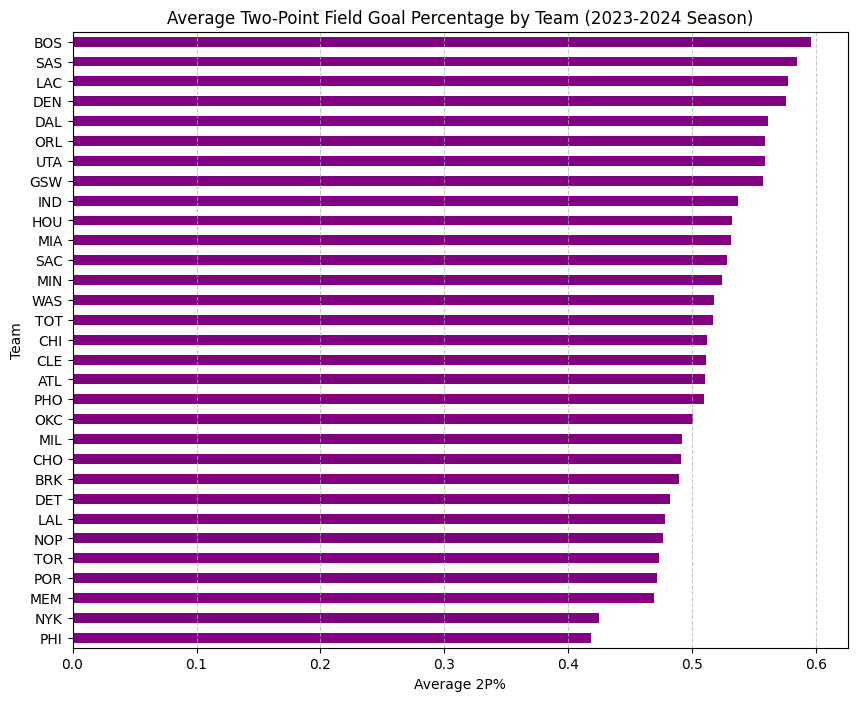

In [6]:
# Calculate the average two-point field goal percentage (2P%) for each team
team_avg_2p = data_iso.groupby('Tm')['2P%'].mean()

# Create a horizontal bar chart for visualization
plt.figure(figsize=(10, 8))
team_avg_2p.sort_values().plot(kind='barh', color='purple')
plt.title('Average Two-Point Field Goal Percentage by Team (2023-2024 Season)')
plt.xlabel('Average 2P%')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Describe the average free throw shooting percentage for all players on each team

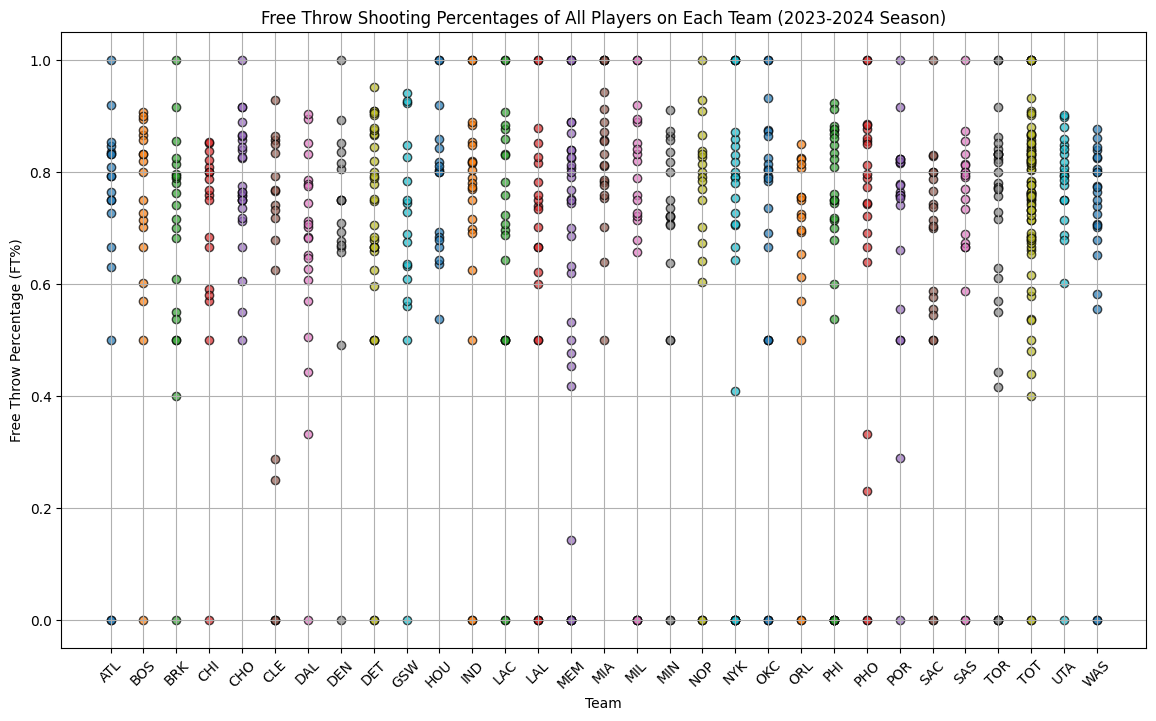

In [8]:
# Create a scatter plot for the free throw shooting percentages of all players on each team
plt.figure(figsize=(14, 8))
for team, group in data_iso.groupby('Tm'):
    plt.scatter(np.full(len(group), team), group['FT%'], alpha=0.7, edgecolors='black')

plt.title('Free Throw Shooting Percentages of All Players on Each Team (2023-2024 Season)')
plt.xlabel('Team')
plt.ylabel('Free Throw Percentage (FT%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

A word cloud of NBA players' Firstnames, the size of which is based on the number of times they appear. Used to determine what the most popular names of NBA players are.

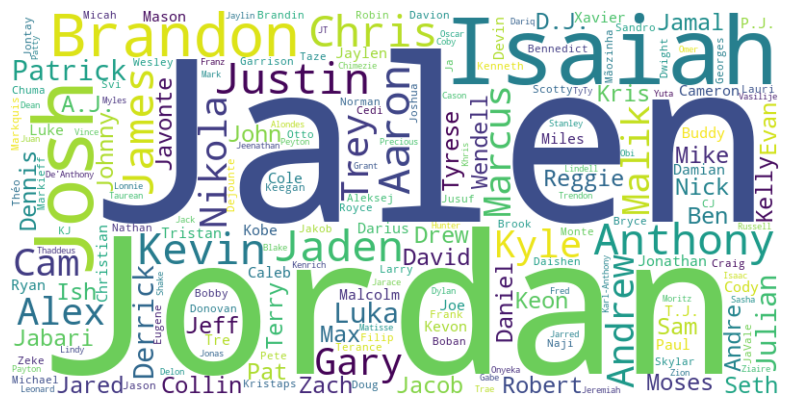

In [11]:
# Extract full names and drop duplicates to ensure each unique player is only counted once
unique_full_names = data_iso['Player'].drop_duplicates()

# Extract and count first names from the unique full names
unique_first_names = unique_full_names.apply(lambda name: name.split()[0])
unique_first_name_frequency = unique_first_names.value_counts()

# Generate a word cloud image for the unique first names
wordcloud_unique_first_names = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unique_first_name_frequency)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_unique_first_names, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

This bar chart illustrates the average minutes each player from different teams spends on the court per game. It highlights which teams might rely more heavily on their players or have deeper rotation policies.

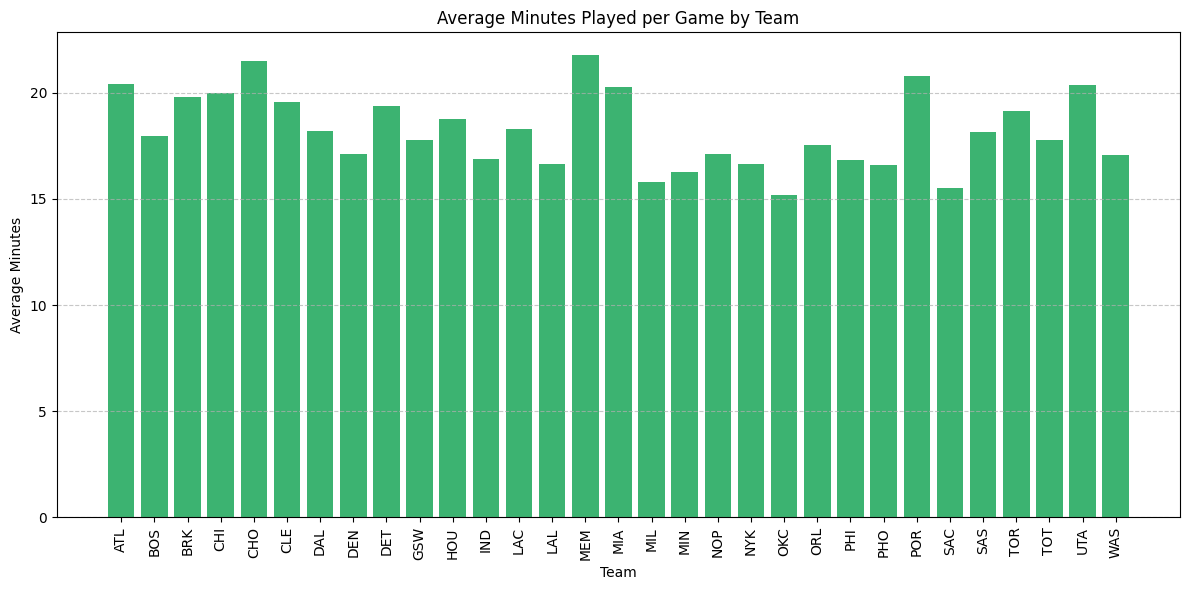

In [12]:
# Average Minutes Played per Game by Team
avg_minutes_by_team = data_iso.groupby('Tm')['MP'].mean().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(avg_minutes_by_team.index, avg_minutes_by_team.values, color='mediumseagreen')
plt.title('Average Minutes Played per Game by Team')
plt.xlabel('Team')
plt.ylabel('Average Minutes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show all plots
plt.tight_layout()
plt.show()

The bar chart above displays the players with the most fouls from each team for the 2023-2024 NBA season. Each bar represents a player, labeled with their name and team, and the length of the bar indicates the total number of fouls committed, highlighting who leads their respective teams in this less desirable statistic.

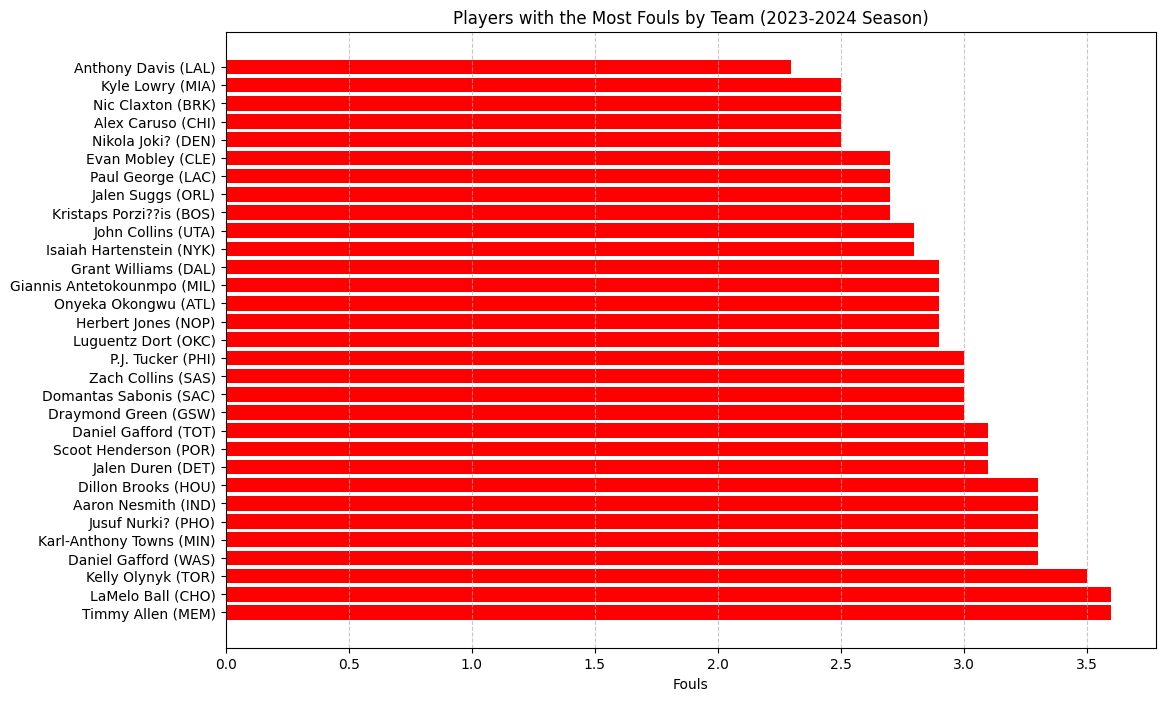

In [13]:
# Filter the columns needed for players and their fouls
player_fouls = data_iso[['Player', 'Tm', 'PF']]

# Group by team and find the player with the maximum fouls in each team
max_fouls_by_team = player_fouls.groupby('Tm').apply(lambda x: x.loc[x['PF'].idxmax()])

# Sort by fouls for better visualization
max_fouls_sorted = max_fouls_by_team.sort_values('PF', ascending=False)

# Create a bar chart for the players with the most fouls in each team
plt.figure(figsize=(12, 8))
plt.barh(max_fouls_sorted['Player'] + " (" + max_fouls_sorted['Tm'] + ")", max_fouls_sorted['PF'], color='red')
plt.xlabel('Fouls')
plt.title('Players with the Most Fouls by Team (2023-2024 Season)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()